# Practica 4

### Primera parte (de Practica 3A)

In [1]:
pip install scikit-learn

In [2]:
!pip install shap
!pip install alibi[all]
!pip install lime
!pip install dice-ml

In [3]:
# generacion de datos aleatorios
SEED = 123

import numpy as np
import pandas as pd

def generar_data(n_samples):
  np.random.seed(SEED)

  # genera datos de presion
  presion = np.random.randint(70, 180, n_samples)

  # genera datos de colesterol
  colesterol = np.random.randint(120, 250, n_samples)

  return presion, colesterol

presion, colesterol = generar_data(800)
df = pd.DataFrame({'Presion': presion, 'Colesterol': colesterol})
df.head()

,Presion,Colesterol
0,179,123
1,136,249
2,162,229
3,168,183
4,172,148


In [4]:
# calculacion de riesgo de problemas vasculares
def calcular_riesgo(presion, colesterol):
  return sum([
    (presion < 100) + (121 <= presion <= 140) + 2 * (presion > 140),
    (180 <= colesterol <= 200) + 2 * (colesterol > 200)
  ])

# comprobamos si la suma total de factores resulta en riesgo de prblemas vasculares
df['Riesgo'] = df.apply(lambda row: calcular_riesgo(row['Presion'], row['Colesterol']), axis=1)
df['Riesgo'] = (df['Riesgo'] >= 3).astype(int)
df.head()

,Presion,Colesterol,Riesgo
0,179,123,0
1,136,249,1
2,162,229,1
3,168,183,1
4,172,148,0


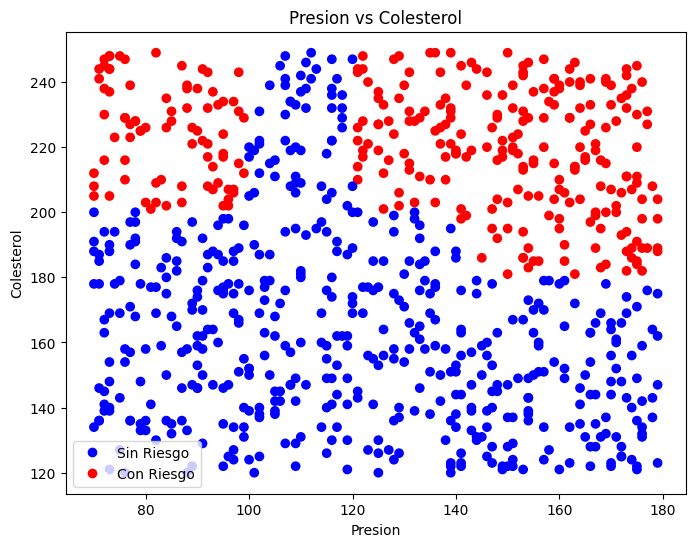

In [5]:
# visualizacion de puntos
import matplotlib.pyplot as plt

colors = {0: 'blue', 1: 'red'}

plt.figure(figsize=(8, 6))
plt.scatter(df['Presion'], df['Colesterol'], c=df['Riesgo'].map(colors))
plt.xlabel('Presion')
plt.ylabel('Colesterol')
plt.title(f'Presion vs Colesterol')
plt.legend(handles=[
  plt.Line2D([], [], marker='o', color='w', markerfacecolor='blue', markersize=8, label='Sin Riesgo'),
  plt.Line2D([], [], marker='o', color='w', markerfacecolor='red', markersize=8, label='Con Riesgo')
])
plt.show()

In [6]:
# separamos datos en entrenamiento y evaluacion
from sklearn.model_selection import train_test_split

X = df[['Presion', 'Colesterol']]
y = df['Riesgo']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [7]:
# entrenamos la red neuronal
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10, 10), max_iter=1000, random_state=SEED)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=123,
              solver='lbfgs')

In [8]:
# evaluamos el modelo
y_pred = mlp.predict(X_test)

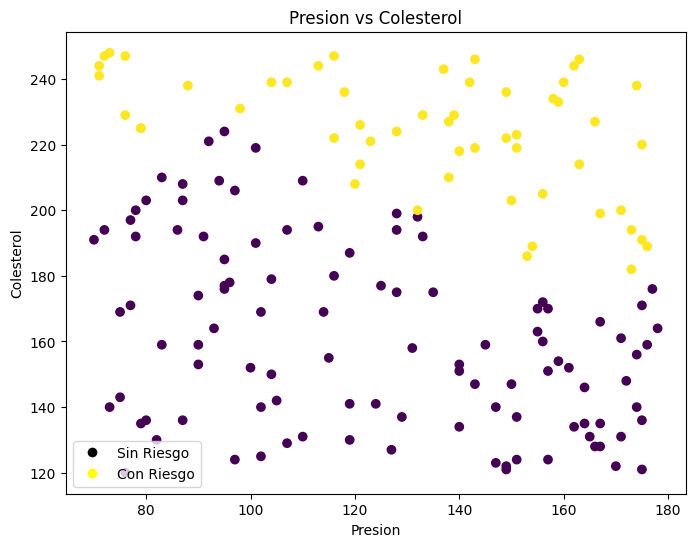

In [9]:
# visaulizamos las predicciones
import matplotlib.pyplot as plt

def plot_predicciones(X_test, y_pred):
  plt.figure(figsize=(8, 6))
  plt.scatter(X_test['Presion'], X_test['Colesterol'], c=y_pred)
  plt.xlabel('Presion')
  plt.ylabel('Colesterol')
  plt.title(f'Presion vs Colesterol')
  plt.legend(handles=[
    plt.Line2D([], [], marker='o', color='w', markerfacecolor='black', markersize=8, label='Sin Riesgo'),
    plt.Line2D([], [], marker='o', color='w', markerfacecolor='yellow', markersize=8, label='Con Riesgo')
  ])
  plt.show()

plot_predicciones(X_test, y_pred)

In [11]:
# metricas de evaluacion
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

def mostrar_metricas(y_test, y_pred):
  print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
  print(f'Precision: {precision_score(y_test, y_pred)}')
  print(f'Recall: {recall_score(y_test, y_pred)}')

mostrar_metricas(y_test, y_pred)

Accuracy: 0.9
Precision: 0.8518518518518519
Recall: 0.8518518518518519


In [12]:
# experimentos con red

# configuracion 1

# 1 - misma separacion de dataset entrenamiento/evaluacion como el original
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, random_state=SEED)

# 2 - cambio de parametros de RRNN
mlp_2 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(20, 20), max_iter=10000, random_state=SEED)
mlp_2.fit(X_train_2, y_train_2)

MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=10000, random_state=123,
              solver='lbfgs')

In [13]:
# evaluamos con nueva RRNN
y_pred_2 = mlp_2.predict(X_test_2)

# metricas del modelo nuevo
mostrar_metricas(y_test_2, y_pred_2)

Accuracy: 0.91875
Precision: 0.847457627118644
Recall: 0.9259259259259259


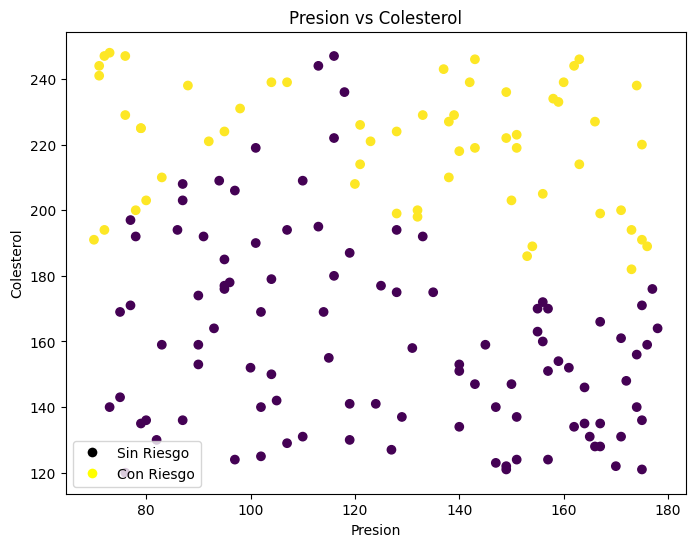

In [14]:
# dibuja el grafico para configuracion 1
plot_predicciones(X_test_2, y_pred_2)

In [15]:
# configuracion 2

# 1 - separacion distina de dataset entrenamiento/evaluacion
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size=0.1, random_state=SEED)

# 2 - mismos parametros de RRNN que en el original
mlp_3 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10, 10), max_iter=1000, random_state=SEED)
mlp_3.fit(X_train_3, y_train_3)

MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=123,
              solver='lbfgs')

In [16]:
# evaluamos con nueva RRNN
y_pred_3 = mlp_3.predict(X_test_3)

# metricas del modelo nuevo
mostrar_metricas(y_test_3, y_pred_3)

Accuracy: 0.9
Precision: 0.875
Recall: 0.8076923076923077


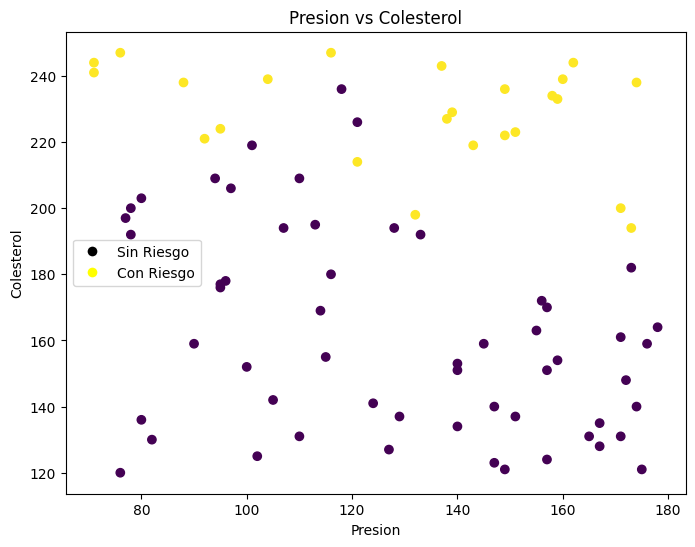

In [17]:
# dibuja el grafico para configuracion 2
plot_predicciones(X_test_3, y_pred_3)

In [18]:
# configuracion 3

# 1 - separacion distina de dataset entrenamiento/evaluacion
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X, y, test_size=0.1, random_state=SEED)

# 2 - cambio de parametros de RRNN
mlp_4 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(20, 20), max_iter=10000, random_state=SEED)
mlp_4.fit(X_train_4, y_train_4)

MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=10000, random_state=123,
              solver='lbfgs')

In [19]:
# evaluamos con nueva RRNN
y_pred_4 = mlp_4.predict(X_test_4)

# metricas del modelo nuevo
mostrar_metricas(y_test_4, y_pred_4)

Accuracy: 0.9375
Precision: 0.8888888888888888
Recall: 0.9230769230769231


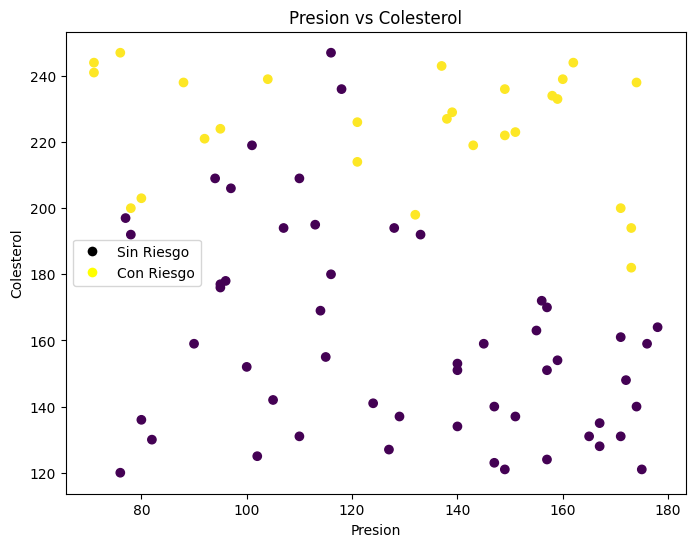

In [20]:
# dibuja el grafico para configuracion 3
plot_predicciones(X_test_4, y_pred_4)

Tenemos 3 configuraciones:
1. Incrementamos cantidad de neurones y num iteraciones, tamano de conjunto evaluacion es lo mismo que original;
2. Los parametros de RRNN los mismos que en original, tamano de conjunto evaluacion es menor;
3. Incrementamos cantidad de neurones y num iteraciones, y tambien cambiamos el tamano de conjunto evaluacion;

Podemos ver, que:
1. en caso de cambiar solo los parametros de RRNN, pueden mejorar un poco accuracy y recall, pero la precision puede bajar.
2. en caso de cambiar solo tamano de conjunto evaluacion, accuracy no cambia mucho, precision puede crecer y recall puede bajar.
3. al incrementar tanto la candidad de neurones en los hidden layers e iteraciones como cambiando el tamano de evaluacion, nos salen las mejores metricas de accuracy y precision, pero recall no es el mas alto.

De esto, podemos concluir que para la mejor precision (que puede ser el factor mas interesante para nosotros), podemos eligir la configuracion 3 (cambiar tanto parametros de RRNN como las distribuciones del dataset).

### Segunda parte (XAI)

Seleccionamos una instancia especifica para explicar

In [21]:
# Tomamos la primera instancia del conjunto test de la config 3
instance_idx = 0
instance = X_test_4.iloc[instance_idx:instance_idx+1]
instance_prediction = mlp_4.predict(instance)[0]
instance_real = y_test_4.iloc[instance_idx]

print("Instancia:")
print(instance)
print("Prediccion:")
print(instance_prediction)
print("Valor real:")
print(instance_real)

Instancia:
     Presion  Colesterol
145       71         241
Prediccion:
1
Valor real:
1


Utilizamos SHAP para explicar unica prediccion

  0%|          | 0/1 [00:00<?, ?it/s]

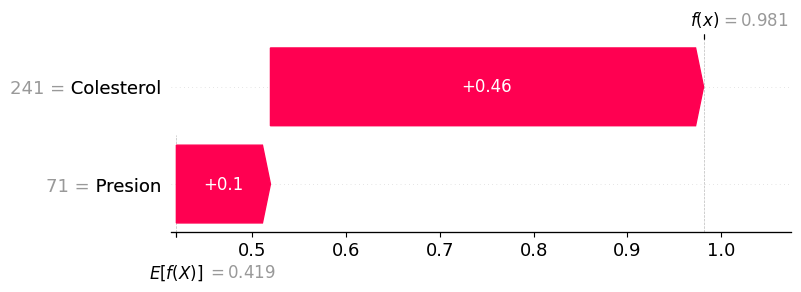

In [24]:
import shap

shap.initjs()

# un explicador SHAP para el modelo MLP
# Tomamos una muestra del conjunto de entrenamiento
background = X_train_4.sample(100, random_state=SEED)

explainer = shap.KernelExplainer(mlp_4.predict_proba, background)
shap_values = explainer.shap_values(instance)

shap_explanation = shap.Explanation(
    values=shap_values[1][0],                 # valores SHAP para la clase positiva (con riesgo)
    base_values=explainer.expected_value[1],  # valor base esperado para la clase positiva
    data=instance.values[0],                  # datos de la instancia
    feature_names=instance.columns            # caracterissticas
)

shap.plots.waterfall(shap_explanation, max_display=10)

El modelo predice una probabilidad muy alta de riesgo cardiovascular (f(x) = 0,981) para este caso particular. El valor esperado base es 0,419, que representa el promedio del resultado del modelo sobre el conjunto de datos de referencia. El colesterol es el feature mas influyente, con contribucion positiva de +0,46 a la prediccion. Presion tiene una contribucion positiva menor, de +0,1 a la prediccion

ALE para generar una explicacion global

X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names


array([[<Axes: xlabel='Presion', ylabel='ALE'>,
        <Axes: xlabel='Colesterol', ylabel='ALE'>]], dtype=object)

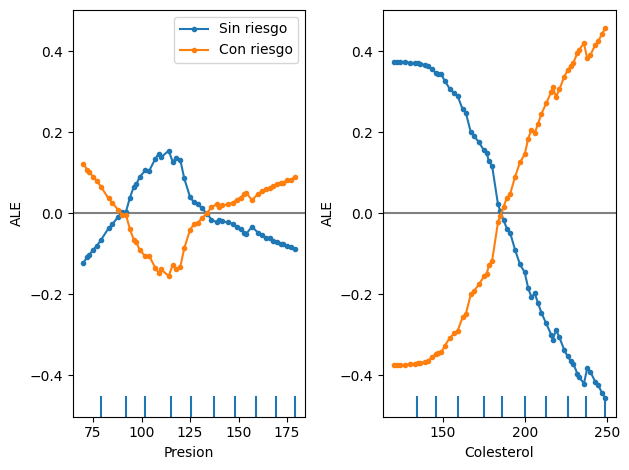

In [30]:
from alibi.explainers import ALE
from alibi.explainers import plot_ale

ale_explainer = ALE(mlp_4.predict_proba, feature_names=X_train_4.columns.tolist(), target_names=['Sin riesgo', 'Con riesgo'])
ale_exp = ale_explainer.explain(X_train_4.values)

plot_ale(ale_exp)

Los valores moderados de Presion (100-125 mmHg) se asocian con una mayor probabilidad de clasificacion como de bajo riesgo, mientras que los valores muy bajos (<80 mmHg) y altos (>150 mmHg) aumentan la probabilidad de una clasificacion de alto riesgo.

Colesterol - el modelo muestra un efecto umbral cerca de 180-200 mg/dL. Los niveles inferiores a 180 mg/dL aumentan la probabilidad de una clasificacion de bajo riesgo, mientras los niveles superiores a 200 mg/dL aumentan notablemente la probabilidad de alto riesgo. El modelo es sensible a las variaciones de colesterol (tiene un efecto mas pronunciado).

LIME para explicar una unica prediccion

In [32]:
import lime
import lime.lime_tabular

explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    X_train_4.values,
    feature_names=X_train_4.columns,
    class_names=['Sin riesgo', 'Con riesgo'],
    mode='classification'
)

# obtenemos la explicacion
exp_lime = explainer_lime.explain_instance(
    instance.values[0],
    mlp_4.predict_proba,
    num_features=len(X_train_4.columns)
)

exp_lime.show_in_notebook(show_table=True)

X does not have valid feature names, but MLPClassifier was fitted with feature names


La probabilidad de la clasificacion "Con riesgo" es 98%, influenciada principalmente por nivel de colesterol de 241 mg/dL, que es mayor del umbral de 219 mg/dL y contribuye en 56% a la evaluacion del riesgo. La Presion de 71 mmHg, menor del umbral de 97 mmHg, contribuye poco 2% a la clasificacion "Sin riesgo". En este modelo, los niveles elevados de colesterol tienen un impacto mayor en la prediccion del riesgo cardiovascular que la Presion baja.

DiCE para obtener contraejemplos

In [40]:
import dice_ml

# Preparamos datos para DiCE
dice_data = dice_ml.Data(dataframe=df, continuous_features=['Presion', 'Colesterol'], outcome_name='Riesgo')

dice_model = dice_ml.Model(model_type='classifier', model=mlp_4, backend='sklearn')
dice_exp = dice_ml.Dice(dice_data, dice_model)

# no agregamos 'Riesgo' a query instance
query_instance = X_test_3.iloc[instance_idx:instance_idx+1].copy()

# generamos contraejemplos
counterfactuals = dice_exp.generate_counterfactuals(
    query_instance,
    total_CFs=3,
    desired_class="opposite"
)

counterfactuals.visualize_as_dataframe(show_only_changes=True)

100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

Query instance (original outcome : 1)


,Presion,Colesterol,Riesgo
0,71,241,1



Diverse Counterfactual set (new outcome: 0)


,Presion,Colesterol,Riesgo
0,142,138,0
1,107,164,0
2,103,182,0


Los resultados indican que la prediccion original de "Con riesgo" con colesterol alto de 241 mg/dL y Presion baja de 71 mmHg podria cambiarse a "Sin riesgo" al reducir significativamente el colesterol a entre 138 y 182 mg/dL y aumentar moderadamente la Presion a un rango de 103 a 142 mmHg. El modelo considera el colesterol alto como un factor de riesgo principal, y que una Presion muy baja tambien puede contribuir al riesgo.

***Conclusiones finales***

Como se puede comprobar que los tres coinciden en que el colesterol es el factor de riesgo principal, es decir, el que más influye en el cálculo del riesgo de problemas cardiovasculares, también se puede apreciar que tanto Lime como Sharp coinciden en el aporte del colesterol en el cálculo del riesgo para la misma instancia situandolo en torno al 0.50 (0.46 y 0.56), además de que ambos coinciden que existe en torno al 98% de probabilidades de que la instacia se resuelva con riesgo = 1.

Lime en concreto aporta una visión más detallada sobre la relación de los factores que intervienen en el cálculo y aporta una visión mucho más completa de la instancia que se esta evaluando. 

Alibi muestra una vista general de como afectan los diferentes valores que tienen las columnas del dataset para el cálculo del riesgo.

Sharp ofrece una vision acumulativa sobre lo que aporta cada factor al cálculo del riesgo que nos ayuda a ver cuanto aporta el colesterol o la presión arterial, pero no ofrece una visión tan completa como Lime.

Por concluir la vision que parece más completa a la hora de valorar una instancia es Lime y para saber como afecta todo el rango de valores de las dos columnas del dataset (colesterol y presión arterial) a la hora de calcular todos los posibles resultados (con riesgo o sin riesgo) es la libreria de alibi (usando el método Accumulated Local Effects)